In [1]:
import json
import plotly_express as px
import numpy as np
import plotly.graph_objects as go
# plotly subplots
from plotly.subplots import make_subplots

our_16k_path = "results/eval_results_layer20_width16k_ninputs200.json"
gemma_16k_path = "results/eval_results_gemmascope_layer20_width16k_l0s_139_22_294_38_71_ninputs200.json"
our_65k_path = "results/eval_results_layer20_width65k_ninputs200.json"
gemma_65k_path = "results/eval_results_gemmascope_layer20_width65k_l0s_114_20_221_34_61_ninputs200.json"

our_16k_9b_path = "results/eval_results_layer20_width16k_ninputs200_9b.json"
our_32k_9b_path = "results/eval_results_layer20_width32k_ninputs200_9b.json"
gemma_16k_9b_path = "results/eval_results_gemmascope_layer20_width16k_ninputs200-9b.json"
gemma_32k_9b_path = "results/eval_results_gemmascope_layer20_width32k_ninputs200-9b.json"

def load_json_file(path):
    with open(path, 'r') as f:
        return json.load(f)

(our_16k_data, our_65k_data, gemma_16k_data, gemma_65k_data,
 our_16k_9b_data, our_32k_9b_data, gemma_16k_9b_data, gemma_32k_9b_data) = [
    load_json_file(p) for p in [
        our_16k_path, our_65k_path, gemma_16k_path, gemma_65k_path,
        our_16k_9b_path, our_32k_9b_path, gemma_16k_9b_path, gemma_32k_9b_path
    ]
]

In [6]:
# For our_data (our_16k_data)
l0s_sorted, frac_variance_explained_sorted = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in our_16k_data.values()
)))

# For gemma_data (gemma_16k_data)
gemma_l0s_sorted, gemma_frac_variance_explained_sorted = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in gemma_16k_data.values()
)))

# For our 65k data
l0s_sorted_65k, frac_variance_explained_sorted_65k = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in our_65k_data.values()
)))

# For gemma 65k data
gemma_l0s_sorted_65k, gemma_frac_variance_explained_sorted_65k = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in gemma_65k_data.values()
)))

# For our 16k 9b data
l0s_sorted_9b, frac_variance_explained_sorted_9b = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in our_16k_9b_data.values()
)))

# For our 32k 9b data
our_32k_l0s_sorted_9b, our_32k_frac_variance_explained_sorted_9b = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in our_32k_9b_data.values()
)))

# For gemma 16k 9b data
gemma_l0s_sorted_9b, gemma_frac_variance_explained_sorted_9b = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in gemma_16k_9b_data.values()
)))

# For gemma 32k 9b data
gemma_32k_l0s_sorted_9b, gemma_32k_frac_variance_explained_sorted_9b = map(list, zip(*sorted(
    (d['l0'], d['frac_variance_explained']) for d in gemma_32k_9b_data.values()
)))


# Style parameters
BASE_FONT_SIZE = 20
BASE_LINE_WIDTH = 5
BASE_MARKER_SIZE = 12

# Color scheme
MODEL_COLORS = {
    'ours': '#636EFA', #'#2E5894',  # Deep blue
    'gemma': '#EF553B' #'#943D2E'  # Deep red
}

# colors: '#636EFA', '#EF553B', '#00CC96', '#AB63FA',

# Create subplot figure
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Gemma-2-2B", "Gemma-2-9B"),
    horizontal_spacing=0.05,
)
fig.update_annotations(font_size=BASE_FONT_SIZE * 1.2)


# Function to add traces with consistent styling
def add_model_trace(x, y, model_type, width, show_in_legend, row=1, col=1):
    """
    Add a trace with consistent styling based on model type and width.
    model_type: 'ours' or 'gemma'
    width: '16k', '32k', or '65k'
    show_in_legend: whether to show in bottom legend
    """
    dash_style = 'solid' if width == '16k' else 'dash'
    
    return fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode='lines+markers',
            name=f"{'Our' if model_type == 'ours' else 'GemmaScope'} SAE",
            marker=dict(
                symbol='circle',
                size=BASE_MARKER_SIZE,
            ),
            line=dict(
                color=MODEL_COLORS[model_type],
                dash=dash_style,
                width=BASE_LINE_WIDTH
            ),
            legendgroup=model_type,
            showlegend=show_in_legend
        ),
        row=row, col=col
    )


# Add traces for first subplot (2.7B model)
add_model_trace(l0s_sorted, frac_variance_explained_sorted, 'ours', '16k', True, 1, 1)
add_model_trace(gemma_l0s_sorted, gemma_frac_variance_explained_sorted, 'gemma', '16k', True, 1, 1)
add_model_trace(l0s_sorted_65k, frac_variance_explained_sorted_65k, 'ours', '65k', False, 1, 1)
add_model_trace(gemma_l0s_sorted_65k, gemma_frac_variance_explained_sorted_65k, 'gemma', '65k', False, 1, 1)

# Add traces for second subplot (9B model)
add_model_trace(l0s_sorted_9b, frac_variance_explained_sorted_9b, 'ours', '16k', False, 1, 2)
add_model_trace(our_32k_l0s_sorted_9b, our_32k_frac_variance_explained_sorted_9b, 'ours', '32k', False, 1, 2)
add_model_trace(gemma_l0s_sorted_9b, gemma_frac_variance_explained_sorted_9b, 'gemma', '16k', False, 1, 2)
add_model_trace(gemma_32k_l0s_sorted_9b, gemma_32k_frac_variance_explained_sorted_9b, 'gemma', '32k', False, 1, 2)

# Add line style legends as annotations
# For 2.7B plot
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)

fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.07,
    text="65k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# For 9B plot
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)

fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.07,
    text="32k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# Update layout
fig.update_layout(
    width=1200,
    height=500,
    margin=dict(l=80, r=30, t=50, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(
        family='Arial',
        size=BASE_FONT_SIZE,
    ),
    legend=dict(
        x=0.5,
        y=-0.2,
        xanchor='center',
        yanchor='top',
        orientation='h',
        itemsizing='constant'
    ),
    yaxis=dict(
        title='Fraction of Variance Explained',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    yaxis2=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    xaxis=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    xaxis2=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    )
)

# Ensure y-axis ranges are the same
y_min = min(
    min(frac_variance_explained_sorted),
    min(gemma_frac_variance_explained_sorted),
    min(frac_variance_explained_sorted_65k),
    min(gemma_frac_variance_explained_sorted_65k),
    min(frac_variance_explained_sorted_9b),
    min(our_32k_frac_variance_explained_sorted_9b),
    min(gemma_frac_variance_explained_sorted_9b),
    min(gemma_32k_frac_variance_explained_sorted_9b)
)

y_max = max(
    max(frac_variance_explained_sorted),
    max(gemma_frac_variance_explained_sorted),
    max(frac_variance_explained_sorted_65k),
    max(gemma_frac_variance_explained_sorted_65k),
    max(frac_variance_explained_sorted_9b),
    max(our_32k_frac_variance_explained_sorted_9b),
    max(gemma_frac_variance_explained_sorted_9b),
    max(gemma_32k_frac_variance_explained_sorted_9b)
)

padding = (y_max - y_min) * 0.05
fig.update_yaxes(range=[y_min - padding, y_max + padding])

# Save as pdf to "figures" folder

# Save figure as PDF
fig.write_image("results/figures/frac_variance_explained.pdf")

fig.show()

In [5]:
import plotly

plotly.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

## Loss Recovered

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Compute loss recovered for each dataset
# For our 16k data
our_16k_l0s, our_16k_loss_recovered = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in our_16k_data.values()
)))

# For our 65k data
our_65k_l0s, our_65k_loss_recovered = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in our_65k_data.values()
)))

# For our 16k 9b data
our_16k_l0s_9b, our_loss_recovered_16k_9b = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in our_16k_9b_data.values()
)))

# For our 32k 9b data
our_32k_l0s_9b, our_32k_loss_recovered_9b = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in our_32k_9b_data.values()
)))

# For gemma 16k data
gemma_16k_l0s, gemma_loss_recovered = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in gemma_16k_data.values()
)))

# For gemma 65k data
gemma_65k_l0s, gemma_65k_loss_recovered = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in gemma_65k_data.values()
)))

# For gemma 16k 9b data
gemma_16k_l0s_9b, gemma_loss_recovered_16k_9b = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in gemma_16k_9b_data.values()
)))

# For gemma 32k 9b data
gemma_32k_l0s_9b, gemma_32k_loss_recovered_9b = map(list, zip(*sorted(
    (d['l0'], 1 - (d['loss_reconstructed'] - d['loss_original']) / (d['loss_zero'] - d['loss_original']))
    for d in gemma_32k_9b_data.values()
)))


# Style parameters
BASE_FONT_SIZE = 20
BASE_LINE_WIDTH = 5
BASE_MARKER_SIZE = 12

# Color scheme
# MODEL_COLORS = {
#     'ours': '#2E5894',  # Deep blue
#     'gemma': '#943D2E'  # Deep red
# }

MODEL_COLORS = {
    'ours': '#636EFA', #'#2E5894',  # Deep blue
    'gemma': '#EF553B' #'#943D2E'  # Deep red
}

# Create subplot figure
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Gemma-2-2B", "Gemma-2-9B"),
    horizontal_spacing=0.05,
)
fig.update_annotations(font_size=BASE_FONT_SIZE * 1.2)


# Function to add traces with consistent styling
def add_model_trace(x, y, model_type, width, show_in_legend, row=1, col=1):
    """
    Add a trace with consistent styling based on model type and width.
    model_type: 'ours' or 'gemma'
    width: '16k', '32k', or '65k'
    show_in_legend: whether to show in the legend
    """
    dash_style = 'solid' if width == '16k' else 'dash'
    
    return fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode='lines+markers',
            name=f"{'Our' if model_type == 'ours' else 'GemmaScope'} SAE",
            marker=dict(
                symbol='circle',
                size=BASE_MARKER_SIZE,
            ),
            line=dict(
                color=MODEL_COLORS[model_type],
                dash=dash_style,
                width=BASE_LINE_WIDTH
            ),
            legendgroup=model_type,
            showlegend=show_in_legend
        ),
        row=row, col=col
    )


# Add traces for first subplot (Gemma-2-2B)
add_model_trace(our_16k_l0s, our_16k_loss_recovered, 'ours', '16k', True, 1, 1)
add_model_trace(gemma_16k_l0s, gemma_loss_recovered, 'gemma', '16k', True, 1, 1)
add_model_trace(our_65k_l0s, our_65k_loss_recovered, 'ours', '65k', False, 1, 1)
add_model_trace(gemma_65k_l0s, gemma_65k_loss_recovered, 'gemma', '65k', False, 1, 1)

# Add traces for second subplot (Gemma-2-9B)
add_model_trace(our_16k_l0s_9b, our_loss_recovered_16k_9b, 'ours', '16k', False, 1, 2)
add_model_trace(our_32k_l0s_9b, our_32k_loss_recovered_9b, 'ours', '32k', False, 1, 2)
add_model_trace(gemma_16k_l0s_9b, gemma_loss_recovered_16k_9b, 'gemma', '16k', False, 1, 2)
add_model_trace(gemma_32k_l0s_9b, gemma_32k_loss_recovered_9b, 'gemma', '32k', False, 1, 2)


# Add line style legends as annotations
# For Gemma-2-2B plot
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)

fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.07,
    text="65k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# For Gemma-2-9B plot
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)

fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.07,
    text="32k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)

fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)


# Update layout
fig.update_layout(
    width=1200,
    height=500,
    margin=dict(l=80, r=30, t=50, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(
        family='Arial',
        size=BASE_FONT_SIZE,
    ),
    legend=dict(
        x=0.5,
        y=-0.2,
        xanchor='center',
        yanchor='top',
        orientation='h',
        itemsizing='constant'
    ),
    xaxis=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    yaxis=dict(
        title='Loss Recovered (%)',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    xaxis2=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    yaxis2=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    )
)

# Ensure y-axis ranges are the same across subplots
y_min = min(
    min(our_16k_loss_recovered),
    min(gemma_loss_recovered),
    min(our_65k_loss_recovered),
    min(gemma_65k_loss_recovered),
    min(our_loss_recovered_16k_9b),
    min(our_32k_loss_recovered_9b),
    min(gemma_loss_recovered_16k_9b),
    min(gemma_32k_loss_recovered_9b)
)

y_max = max(
    max(our_16k_loss_recovered),
    max(gemma_loss_recovered),
    max(our_65k_loss_recovered),
    max(gemma_65k_loss_recovered),
    max(our_loss_recovered_16k_9b),
    max(our_32k_loss_recovered_9b),
    max(gemma_loss_recovered_16k_9b),
    max(gemma_32k_loss_recovered_9b)
)

padding = (y_max - y_min) * 0.05
fig.update_yaxes(range=[y_min - padding, y_max + padding])

# Save figure as PDF and show
fig.write_image("results/figures/loss_recovered.pdf")
fig.show()

## L2

In [11]:
# Same thing for l2_loss
# For our 16k data
l0s = []
l2_loss = []
for trainer in our_16k_data:
    l0s.append(our_16k_data[trainer]['l0'])
    l2_loss.append(our_16k_data[trainer]['l2_loss'])

# Sort our_data by l0 values
sorted_our = sorted(zip(l0s, l2_loss))
l0s_sorted, l2_loss_sorted = zip(*sorted_our)
l0s_sorted = list(l0s_sorted)
l2_loss_sorted = list(l2_loss_sorted)

# For gemma 16k data
gemma_l0s = []
gemma_l2_loss = []
for key in gemma_16k_data:
    gemma_l0s.append(gemma_16k_data[key]['l0'])
    gemma_l2_loss.append(gemma_16k_data[key]['l2_loss'])

# Sort gemma_data by l0 values
sorted_gemma = sorted(zip(gemma_l0s, gemma_l2_loss))
gemma_l0s_sorted, gemma_l2_loss_sorted = zip(*sorted_gemma)
gemma_l0s_sorted = list(gemma_l0s_sorted)
gemma_l2_loss_sorted = list(gemma_l2_loss_sorted)

# Create figure with all traces
fig = go.Figure()

# Add our 16k data trace
fig.add_trace(go.Scatter(
    x=l0s_sorted,
    y=l2_loss_sorted,
    mode='lines+markers',
    name='Our Model (16k)',
    marker=dict(symbol='circle'),
    line=dict(color='blue', dash='solid')
))

# Add gemma 16k data trace
fig.add_trace(go.Scatter(
    x=gemma_l0s_sorted,
    y=gemma_l2_loss_sorted,
    mode='lines+markers',
    name='Gemma Model (16k)',
    marker=dict(symbol='circle'),
    line=dict(color='red', dash='solid')
))

# Add our 65k data
l0s_65k = []
l2_loss_65k = []
for trainer in our_65k_data:
    l0s_65k.append(our_65k_data[trainer]['l0'])
    l2_loss_65k.append(our_65k_data[trainer]['l2_loss'])

sorted_our_65k = sorted(zip(l0s_65k, l2_loss_65k))
l0s_sorted_65k, l2_loss_sorted_65k = zip(*sorted_our_65k)

fig.add_trace(go.Scatter(
    x=l0s_sorted_65k,
    y=l2_loss_sorted_65k,
    mode='lines+markers',
    name='Our Model (65k)',
    marker=dict(symbol='circle'),
    line=dict(color='blue', dash='dash')
))

# Add gemma 65k data
gemma_l0s_65k = []
gemma_l2_loss_65k = []
for key in gemma_65k_data:
    gemma_l0s_65k.append(gemma_65k_data[key]['l0'])
    gemma_l2_loss_65k.append(gemma_65k_data[key]['l2_loss'])

sorted_gemma_65k = sorted(zip(gemma_l0s_65k, gemma_l2_loss_65k))
gemma_l0s_sorted_65k, gemma_l2_loss_sorted_65k = zip(*sorted_gemma_65k)

fig.add_trace(go.Scatter(
    x=gemma_l0s_sorted_65k,
    y=gemma_l2_loss_sorted_65k,
    mode='lines+markers',
    name='Gemma Model (65k)',
    marker=dict(symbol='circle'),
    line=dict(color='red', dash='dash')
))

# Update layout
fig.update_layout(
    title="L0 vs L2 Loss",
    xaxis_title="L0",
    yaxis_title="L2 Loss",
    width=600,
    showlegend=True
)

fig.show()

# Create second figure for 9B models
fig2 = go.Figure()

# For our 16k 9b data
l0s_9b = []
l2_loss_9b = []
for trainer in our_16k_9b_data:
    l0s_9b.append(our_16k_9b_data[trainer]['l0'])
    l2_loss_9b.append(our_16k_9b_data[trainer]['l2_loss'])

# Sort 9b data by l0 values
sorted_9b = sorted(zip(l0s_9b, l2_loss_9b))
l0s_sorted_9b, l2_loss_sorted_9b = zip(*sorted_9b)

fig2.add_trace(go.Scatter(
    x=l0s_sorted_9b,
    y=l2_loss_sorted_9b,
    mode='lines+markers',
    name='Our Model (16k, 9B)',
    marker=dict(symbol='circle'),
    line=dict(color='blue', dash='solid')
))

# For our 32k 9b data
l0s_32k_9b = []
l2_loss_32k_9b = []
for trainer in our_32k_9b_data:
    l0s_32k_9b.append(our_32k_9b_data[trainer]['l0'])
    l2_loss_32k_9b.append(our_32k_9b_data[trainer]['l2_loss'])

# Sort our 32k 9b data by l0 values
sorted_32k_9b = sorted(zip(l0s_32k_9b, l2_loss_32k_9b))
l0s_sorted_32k_9b, l2_loss_sorted_32k_9b = zip(*sorted_32k_9b)

fig2.add_trace(go.Scatter(
    x=l0s_sorted_32k_9b,
    y=l2_loss_sorted_32k_9b,
    mode='lines+markers',
    name='Our Model (32k, 9B)',
    marker=dict(symbol='circle'),
    line=dict(color='blue', dash='dash')
))

# For gemma 16k 9b data
gemma_l0s_9b = []
gemma_l2_loss_9b = []
for key in gemma_16k_9b_data:
    gemma_l0s_9b.append(gemma_16k_9b_data[key]['l0'])
    gemma_l2_loss_9b.append(gemma_16k_9b_data[key]['l2_loss'])

# Sort gemma 9b data by l0 values
sorted_gemma_9b = sorted(zip(gemma_l0s_9b, gemma_l2_loss_9b))
gemma_l0s_sorted_9b, gemma_l2_loss_sorted_9b = zip(*sorted_gemma_9b)

fig2.add_trace(go.Scatter(
    x=gemma_l0s_sorted_9b,
    y=gemma_l2_loss_sorted_9b,
    mode='lines+markers',
    name='Gemma Model (16k, 9B)',
    marker=dict(symbol='circle'),
    line=dict(color='red', dash='solid')
))

# For gemma 32k 9b data
gemma_32k_l0s_9b = []
gemma_32k_l2_loss_9b = []
for key in gemma_32k_9b_data:
    gemma_32k_l0s_9b.append(gemma_32k_9b_data[key]['l0'])
    gemma_32k_l2_loss_9b.append(gemma_32k_9b_data[key]['l2_loss'])

# Sort gemma 32k 9b data by l0 values
sorted_gemma_32k_9b = sorted(zip(gemma_32k_l0s_9b, gemma_32k_l2_loss_9b))
gemma_32k_l0s_sorted_9b, gemma_32k_l2_loss_sorted_9b = zip(*sorted_gemma_32k_9b)

fig2.add_trace(go.Scatter(
    x=gemma_32k_l0s_sorted_9b,
    y=gemma_32k_l2_loss_sorted_9b,
    mode='lines+markers',
    name='Gemma Model (32k, 9B)',
    marker=dict(symbol='circle'),
    line=dict(color='red', dash='dash')
))

# Update layout for second figure
fig2.update_layout(
    title="L0 vs L2 Loss (9B Model)",
    xaxis_title="L0",
    yaxis_title="L2 Loss",
    width=600,
    showlegend=True
)

fig2.show()


## Cosine Similarity

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Data Processing ---

# For our 16k data
our_16k_l0s, our_16k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in our_16k_data.values()
)))

# For our 65k data
our_65k_l0s, our_65k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in our_65k_data.values()
)))

# For our 16k 9B data
our_16k_9b_l0s, our_16k_9b_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in our_16k_9b_data.values()
)))

# For our 32k 9B data
our_32k_l0s, our_32k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in our_32k_9b_data.values()
)))

# For gemma 16k data
gemma_16k_l0s, gemma_16k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in gemma_16k_data.values()
)))

# For gemma 65k data
gemma_65k_l0s, gemma_65k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in gemma_65k_data.values()
)))

# For gemma 32k (9B) data
gemma_32k_l0s, gemma_32k_cossim = map(list, zip(*sorted(
    (d['l0'], d['cossim'])
    for d in gemma_32k_9b_data.values()
)))


# --- Styling Parameters ---

BASE_FONT_SIZE = 20
BASE_LINE_WIDTH = 5
BASE_MARKER_SIZE = 12

MODEL_COLORS = {
    'ours': '#636EFA', #'#2E5894',  # Deep blue
    'gemma': '#EF553B' #'#943D2E'  # Deep red
}

# --- Create Subplots ---

# Left subplot (Gemma-2-2B): our 16k & 65k and gemma 16k & 65k
# Right subplot (Gemma-2-9B): our 16k‑9B & 32k‑9B and gemma 16k & 32k
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Gemma-2-2B", "Gemma-2-9B"),
    horizontal_spacing=0.05,
)
fig.update_annotations(font_size=BASE_FONT_SIZE * 1.2)

# --- Helper Function to Add Traces ---

def add_model_trace(x, y, model_type, width, show_in_legend, row=1, col=1):
    """
    Add a trace with consistent styling.
    
    Parameters:
      model_type: 'ours' or 'gemma'
      width: '16k', '32k', or '65k' (determines the line dash style)
      show_in_legend: Boolean to indicate whether this trace appears in the legend
      row, col: Subplot location
    """
    dash_style = 'solid' if width == '16k' else 'dash'
    
    return fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode='lines+markers',
            name=f"{'Our' if model_type=='ours' else 'GemmaScope'} Model",
            marker=dict(
                symbol='circle',
                size=BASE_MARKER_SIZE,
            ),
            line=dict(
                color=MODEL_COLORS[model_type],
                dash=dash_style,
                width=BASE_LINE_WIDTH
            ),
            legendgroup=model_type,
            showlegend=show_in_legend
        ),
        row=row, col=col
    )

# --- Add Traces to Subplots ---

# Left subplot (Gemma-2-2B)
add_model_trace(our_16k_l0s, our_16k_cossim, 'ours', '16k', True, row=1, col=1)
add_model_trace(our_65k_l0s, our_65k_cossim, 'ours', '65k', False, row=1, col=1)
add_model_trace(gemma_16k_l0s, gemma_16k_cossim, 'gemma', '16k', True, row=1, col=1)
add_model_trace(gemma_65k_l0s, gemma_65k_cossim, 'gemma', '65k', False, row=1, col=1)

# Right subplot (Gemma-2-9B) – set show_in_legend to False to avoid duplicates
add_model_trace(our_16k_9b_l0s, our_16k_9b_cossim, 'ours', '16k', False, row=1, col=2)
add_model_trace(our_32k_l0s, our_32k_cossim, 'ours', '32k', False, row=1, col=2)
add_model_trace(gemma_16k_l0s, gemma_16k_cossim, 'gemma', '16k', False, row=1, col=2)
add_model_trace(gemma_32k_l0s, gemma_32k_cossim, 'gemma', '32k', False, row=1, col=2)

# --- Add Line-Style Legends as Annotations ---

# For Gemma-2-2B (left subplot)
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)
fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.07,
    text="65k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)
fig.add_shape(
    type="line",
    xref="x domain", yref="y domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# For Gemma-2-9B (right subplot)
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.15,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)
fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.15, y1=0.15,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.07,
    text="32k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right",
    yanchor="bottom"
)
fig.add_shape(
    type="line",
    xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95,
    y0=0.07, y1=0.07,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# --- Update Layout ---

fig.update_layout(
    width=1200,
    height=500,
    margin=dict(l=80, r=30, t=50, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(
        family='Arial',
        size=BASE_FONT_SIZE,
    ),
    legend=dict(
        x=0.5,
        y=-0.2,
        xanchor='center',
        yanchor='top',
        orientation='h',
        itemsizing='constant'
    ),
    xaxis=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    yaxis=dict(
        title='Cosine Similarity',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    xaxis2=dict(
        title='L0',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    ),
    yaxis2=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgray',
    )
)

# Set consistent y-axis ranges across subplots
y_min = min(
    min(our_16k_cossim),
    min(our_65k_cossim),
    min(our_16k_9b_cossim),
    min(our_32k_cossim),
    min(gemma_16k_cossim),
    min(gemma_65k_cossim),
    min(gemma_32k_cossim)
)
y_max = max(
    max(our_16k_cossim),
    max(our_65k_cossim),
    max(our_16k_9b_cossim),
    max(our_32k_cossim),
    max(gemma_16k_cossim),
    max(gemma_65k_cossim),
    max(gemma_32k_cossim)
)
padding = (y_max - y_min) * 0.05
fig.update_yaxes(range=[y_min - padding, y_max + padding])

# Save the figure as a PDF and display it
fig.write_image("results/figures/cossim.pdf")
fig.show()


## Relative Reconstruction Bias

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === Data processing: compute relative reconstruction bias ===

# For our 16k data
our_16k_l0s, our_rel_recon_bias = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in our_16k_data.values()
)))

# For gemma 16k data
gemma_16k_l0s, gemma_rel_recon_bias = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in gemma_16k_data.values()
)))

# For our 65k data
our_65k_l0s, our_65k_rel_recon_bias = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in our_65k_data.values()
)))

# For gemma 65k data
gemma_65k_l0s, gemma_65k_rel_recon_bias = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in gemma_65k_data.values()
)))

# For our 16k 9b data
our_16k_l0s_9b, our_rel_recon_bias_16k_9b = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in our_16k_9b_data.values()
)))

# For our 32k 9b data
our_32k_l0s_9b, our_32k_rel_recon_bias_9b = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in our_32k_9b_data.values()
)))

# For gemma 16k 9b data
gemma_16k_l0s_9b, gemma_rel_recon_bias_16k_9b = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in gemma_16k_9b_data.values()
)))

# For gemma 32k 9b data
gemma_32k_l0s_9b, gemma_32k_rel_recon_bias_9b = map(list, zip(*sorted(
    (d['l0'], d['relative_reconstruction_bias'])
    for d in gemma_32k_9b_data.values()
)))


# === Styling parameters ===

BASE_FONT_SIZE = 20
BASE_LINE_WIDTH = 5
BASE_MARKER_SIZE = 12

MODEL_COLORS = {
    'ours': '#636EFA', #'#2E5894',  # Deep blue
    'gemma': '#EF553B' #'#943D2E'  # Deep red
}


# === Create subplot figure ===

# Left subplot: models from 16k (solid) and 65k (dash)
# Right subplot: models from 16k (solid) and 32k (dash)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Gemma-2-2B", "Gemma-2-9B"),
    horizontal_spacing=0.05,
)
fig.update_annotations(font_size=BASE_FONT_SIZE * 1.2)


# === Helper function to add traces with consistent styling ===

def add_model_trace(x, y, model_type, width, show_in_legend, row=1, col=1):
    """
    Add a trace with consistent styling based on:
      - model_type: 'ours' or 'gemma'
      - width: '16k', '32k', or '65k' (determines dash style)
      - show_in_legend: whether the trace should be labeled in the legend
    """
    dash_style = 'solid' if width == '16k' else 'dash'
    return fig.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode='lines+markers',
            name=f"{'Our' if model_type == 'ours' else 'GemmaScope'} SAE",
            marker=dict(symbol='circle', size=BASE_MARKER_SIZE),
            line=dict(color=MODEL_COLORS[model_type], dash=dash_style, width=BASE_LINE_WIDTH),
            legendgroup=model_type,
            showlegend=show_in_legend
        ),
        row=row, col=col
    )


# === Add traces to the first subplot (Gemma-2-2B: 16k and 65k) ===

add_model_trace(our_16k_l0s, our_rel_recon_bias, 'ours', '16k', True, 1, 1)
add_model_trace(gemma_16k_l0s, gemma_rel_recon_bias, 'gemma', '16k', True, 1, 1)
add_model_trace(our_65k_l0s, our_65k_rel_recon_bias, 'ours', '65k', False, 1, 1)
add_model_trace(gemma_65k_l0s, gemma_65k_rel_recon_bias, 'gemma', '65k', False, 1, 1)


# === Add traces to the second subplot (Gemma-2-9B: 16k and 32k) ===

add_model_trace(our_16k_l0s_9b, our_rel_recon_bias_16k_9b, 'ours', '16k', False, 1, 2)
add_model_trace(our_32k_l0s_9b, our_32k_rel_recon_bias_9b, 'ours', '32k', False, 1, 2)
add_model_trace(gemma_16k_l0s_9b, gemma_rel_recon_bias_16k_9b, 'gemma', '16k', False, 1, 2)
add_model_trace(gemma_32k_l0s_9b, gemma_32k_rel_recon_bias_9b, 'gemma', '32k', False, 1, 2)


# === Add line style legend annotations in the UPPER right-hand corner ===

# For Gemma-2-2B subplot: Solid = 16k, Dashed = 65k
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.85,  # Moved to upper right
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right", yanchor="top"
)
fig.add_shape(
    type="line", xref="x domain", yref="y domain",
    x0=0.75, x1=0.95, y0=0.85, y1=0.85,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)
fig.add_annotation(
    xref="x domain", yref="y domain",
    x=0.98, y=0.75,  # Adjusted position for second legend entry
    text="65k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right", yanchor="top"
)
fig.add_shape(
    type="line", xref="x domain", yref="y domain",
    x0=0.75, x1=0.95, y0=0.75, y1=0.75,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)

# For Gemma-2-9B subplot: Solid = 16k, Dashed = 32k
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.85,
    text="16k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right", yanchor="top"
)
fig.add_shape(
    type="line", xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95, y0=0.85, y1=0.85,
    line=dict(color="black", width=BASE_LINE_WIDTH)
)
fig.add_annotation(
    xref="x2 domain", yref="y2 domain",
    x=0.98, y=0.75,
    text="32k",
    showarrow=False,
    font=dict(size=BASE_FONT_SIZE),
    xanchor="right", yanchor="top"
)
fig.add_shape(
    type="line", xref="x2 domain", yref="y2 domain",
    x0=0.75, x1=0.95, y0=0.75, y1=0.75,
    line=dict(color="black", width=BASE_LINE_WIDTH, dash="dash")
)


# === Update layout ===

fig.update_layout(
    width=1200,
    height=500,
    margin=dict(l=80, r=30, t=50, b=80),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=BASE_FONT_SIZE),
    legend=dict(
        x=0.5, y=-0.2, xanchor='center', yanchor='top',
        orientation='h', itemsizing='constant'
    ),
    xaxis=dict(
        title='L0',
        showgrid=True, gridwidth=1, gridcolor='lightgray',
        zeroline=True, zerolinewidth=1, zerolinecolor='lightgray'
    ),
    yaxis=dict(
        title='Relative Reconstruction Bias',
        showgrid=True, gridwidth=1, gridcolor='lightgray',
        zeroline=True, zerolinewidth=1, zerolinecolor='lightgray'
    ),
    xaxis2=dict(
        title='L0',
        showgrid=True, gridwidth=1, gridcolor='lightgray',
        zeroline=True, zerolinewidth=1, zerolinecolor='lightgray'
    ),
    yaxis2=dict(
        showgrid=True, gridwidth=1, gridcolor='lightgray',
        zeroline=True, zerolinewidth=1, zerolinecolor='lightgray'
    )
)

# Optionally, ensure both subplots use the same y-axis range:
y_min = min(
    min(our_rel_recon_bias),
    min(gemma_rel_recon_bias),
    min(our_65k_rel_recon_bias),
    min(gemma_65k_rel_recon_bias),
    min(our_rel_recon_bias_16k_9b),
    min(our_32k_rel_recon_bias_9b),
    min(gemma_rel_recon_bias_16k_9b),
    min(gemma_32k_rel_recon_bias_9b)
)
y_max = max(
    max(our_rel_recon_bias),
    max(gemma_rel_recon_bias),
    max(our_65k_rel_recon_bias),
    max(gemma_65k_rel_recon_bias),
    max(our_rel_recon_bias_16k_9b),
    max(our_32k_rel_recon_bias_9b),
    max(gemma_rel_recon_bias_16k_9b),
    max(gemma_32k_rel_recon_bias_9b)
)
padding = (y_max - y_min) * 0.05
fig.update_yaxes(range=[y_min - padding, y_max + padding])

# Save the figure as PDF and display
fig.write_image("results/figures/relative_reconstruction_bias.pdf")
fig.show()


## Dark Matter

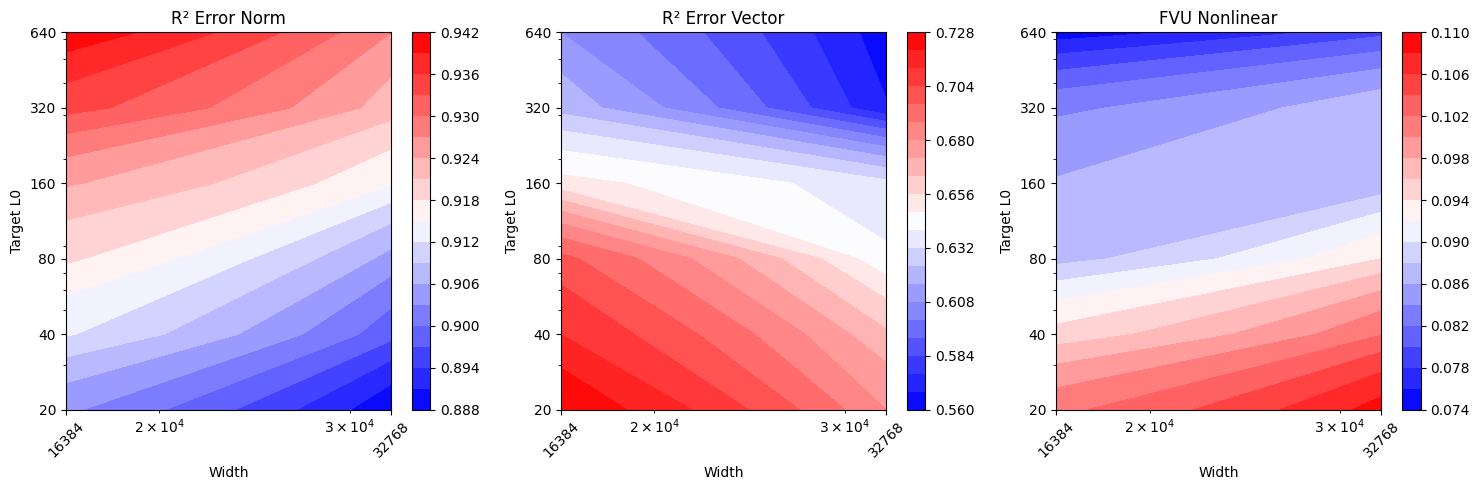

In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the JSON data
with open('results/dark_matter/dark_matter_results_our.json', 'r') as f:
    data = json.load(f)

# Filter for only 9b models
data = [d for d in data if d['lm_name'] == 'google/gemma-2-9b']

# Extract unique values for width and target_l0
widths = sorted(list(set(d['width'] for d in data)))
target_l0s = sorted(list(set(d['target_l0'] for d in data)))

# Create meshgrid for contour plotting
X, Y = np.meshgrid(widths, target_l0s)

# Initialize arrays for metrics
r2_error_norm = np.zeros((len(target_l0s), len(widths)))
r2_error_vector = np.zeros_like(r2_error_norm)
fvu_nonlinear = np.zeros_like(r2_error_norm)

# Fill the arrays
for d in data:
    i = target_l0s.index(d['target_l0'])
    j = widths.index(d['width'])
    r2_error_norm[i, j] = d['r2_error_norm']
    r2_error_vector[i, j] = d['r2_error_vector']
    fvu_nonlinear[i, j] = d['fvu_nonlinear']

# Create custom colormap from blue to red
colors = ['#0000ff', '#ffffff', '#ff0000']
n_bins = 100
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Create the figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot contours
levels = 20
plots = [
    (ax1, r2_error_norm, 'R² Error Norm'),
    (ax2, r2_error_vector, 'R² Error Vector'),
    (ax3, fvu_nonlinear, 'FVU Nonlinear')
]

for ax, Z, title in plots:
    cs = ax.contourf(X, Y, Z, levels=levels, cmap=cmap)
    ax.set_xlabel('Width')
    ax.set_ylabel('Target L0')
    ax.set_title(title)
    plt.colorbar(cs, ax=ax)
    
    # Set log scale
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Add actual width and target_l0 values as ticks
    ax.set_xticks(widths)
    ax.set_yticks(target_l0s)
    ax.set_xticklabels([f'{int(w)}' for w in widths], rotation=45)
    ax.set_yticklabels([f'{int(t)}' for t in target_l0s])

plt.tight_layout()
plt.show()